# Prácticas 05-06  (5%, 5%) Entrega Lección Semana 9, 17:30 horas
## Entrega grupal

# Predicción de la calidad del vino.

El ejercicio descrito a continuación será desarrollado a lo largo de varias prácticas. En este documento se enunciarán las actividades correspondientes a las prácticas 5 y 6.

## Propósito del ejercicio:

Aplicar técnicas de aprendizaje automático para predecir la calidad del vino en base a sus características químicas. Este es un problema de regresión, donde la variable objetivo (quality) es continua. Para lograrlo, se realizará un análisis exploratorio, se prepararán (preprocesarán) los datos para el entrenamiento, se entrenarán modelos para seleccionar el de mejor rendimiento, se afinará el modelo seleccionado y finalmente este se evaluará usando el conjunto de prueba.

## Propósito de las prácticas 5 y 6
Explorar y preprocesar el data set.

## Actividades

1. Análisis exploratorio inicial: 
    1. Distribuciones y relaciones: Utilizar tablas de frecuencias, resúmenes numéricos, resúmenes gráficos (Histogramas, Box-plots) para analizar la distribución de cada característica. Buscar posibles correlaciones. Identificar posibles atributos que deban ser considerados en la estratificación de los conjuntos de entrenamiento y prueba. Identificar valores extremos.
1. Separación de datos: Dividir el dataset en conjuntos de entrenamiento y prueba, si se aplica estratificación compárelos con los conjuntos que resultarían al dividirlos solo de forma aleatoria.
1. Preprocesamiento del conjunto de entrenamiento:
    1. Manejo de valores faltantes: Revisar si hay valores faltantes y aplicar una estrategia para manejarlos (por ejemplo, eliminación o imputación).
    1. Escalado: Usar técnicas de escalado (como normalización o estandarización) para escalar los datos numéricos y mejorar el desempeño de algunos modelos.
    1. Codificación de datos categóricas: Utilizar One-Hot Encoding para variables con categorías.
    1. Creación de nuevas características: Revisar la utilidad de generar nuevas variables.
2. Automatización del preprocesamiento: Usar "pipelines" y transformadores para automatizar los pasos del preprocesamiento del conjunto de entrenamiento   


## Descripción del Dataset:

En estas prácticas se utilizará el dataset de vinos (Wine Quality Dataset), que contiene información sobre diversas características químicas de los vinos y su calidad. El objetivo es predecir la calidad del vino utilizando las características proporcionadas. El dataset se compone de dos tipos de vino: vino rojo y vino blanco.

**Características del Dataset:**

El dataset contiene 12 variables, de las cuales 11 son características o atributos (variables predictoras) y una es la variable objetivo (la calidad del vino). Las variables se describen a continuación:

- Variables predictoras 
    - fixed acidity: Acidez fija del vino (valor numérico).
    - volatile acidity: Acidez volátil del vino (valor numérico).
    - citric acid: Cantidad de ácido cítrico en el vino (valor numérico).
    - residual sugar: Cantidad de azúcar residual en el vino (valor numérico).
    - chlorides: Nivel de cloruros en el vino (valor numérico).
    - free sulfur dioxide: Cantidad de dióxido de azufre libre (valor numérico).
    - total sulfur dioxide: Cantidad total de dióxido de azufre (valor numérico).
    - density: Densidad del vino (valor numérico).
    - pH: pH del vino (valor numérico).
    - sulphates: Nivel de sulfatos en el vino (valor numérico).
    - alcohol: Porcentaje de alcohol en el vino (valor numérico).

- Variable Objetivo:
    - quality: Calidad del vino medida en una escala del 0 al 10, siendo 0 la menor calidad y 10 la mayor. Esta es la variable que se debe predecir utilizando los datos proporcionados.

El data set está separado en dos archivos (uno para vino rojo y otro para vino blanco). Únalos en un solo archivo y agregue una columna categórica para identificar el tipo de vino con los siguientes valores: "Blanco" y "Rojo".

Borre aleatoriamente algunos valores en las columnas de algunos registros para generar nulos.

Referencia del data set:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.


### En próximas prácticas .....
Usando el pipeline de preprocesamiento se entrenarán varios modelos, se seleccionará, se afinará y se probará el mejor.

In [31]:
## Ingrese su código a partir de esta celda

In [32]:
import sys
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
vinoRojo = pd.read_csv('winequality-red.csv', sep=";")
vinoBlanco = pd.read_csv('winequality-white.csv', sep=";")

In [34]:
vinoRojo.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
vinoBlanco.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [36]:
vinoRojo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Punto 2

In [37]:
from sklearn.model_selection import train_test_split as tts
#creamos los primeros datasets de prueba y entranamiento

# vino rojo
vinoRojo_train_set, vinoRojo_test_set = tts(vinoRojo, test_size=0.2, random_state=42)
print("Vino Rojo train set size: ",vinoRojo_train_set.shape)
print("Vino Rojo test set size: ", vinoRojo_test_set.size, "\n")


#vino blanco
vinoBlanco_train_set, vinoBlanco_test_set = tts(vinoBlanco, test_size=0.2, random_state=42)
print("Vino blanco train set size: ",vinoBlanco_train_set.shape)
print("Vino blanco test set size: ", vinoBlanco_test_set.size)

Vino Rojo train set size:  (1279, 12)
Vino Rojo test set size:  3840 

Vino blanco train set size:  (3918, 12)
Vino blanco test set size:  11760


## Punto 3

# Punto 3.1

In [38]:
vinoRojo_Nulos = vinoRojo_train_set.isnull().sum()
print("valores nulos en dataset 1:", valores_faltantes, "\n")

vinoBlanco_Nulos = vinoBlanco_train_set.isnull().sum()
print("valores nulos en dataset 2:", vinoBlanco_Nulos)

valores nulos en dataset 1: fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    0
dtype: int64 

valores nulos en dataset 2: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Punto 3.2

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
scaler_standard = StandardScaler()
# Separamos la variable objetivo
quality_vino_tinto = vinoRojo_train_set["quality"]
vt = vinoRojo_train_set.drop("quality", axis=1)

# Vino blanco 
quality_vino_blanco = vinoBlanco_train_set["quality"]
vb = vinoBlanco_train_set.drop("quality", axis=1)

# Escalamos los datos
vt_train_scaled = scaler_standard.fit_transform(vt)
vb_train_scaled = scaler_standard.fit_transform(vb)

# Convertir de vuelta a DataFrame
vt_train_scaled = pd.DataFrame(vt_train_scaled, 
                               columns=vt.columns, 
                               index=vt.index)

vb_train_scaled = pd.DataFrame(vb_train_scaled, 
                               columns=vb.columns, 
                               index=vb.index)


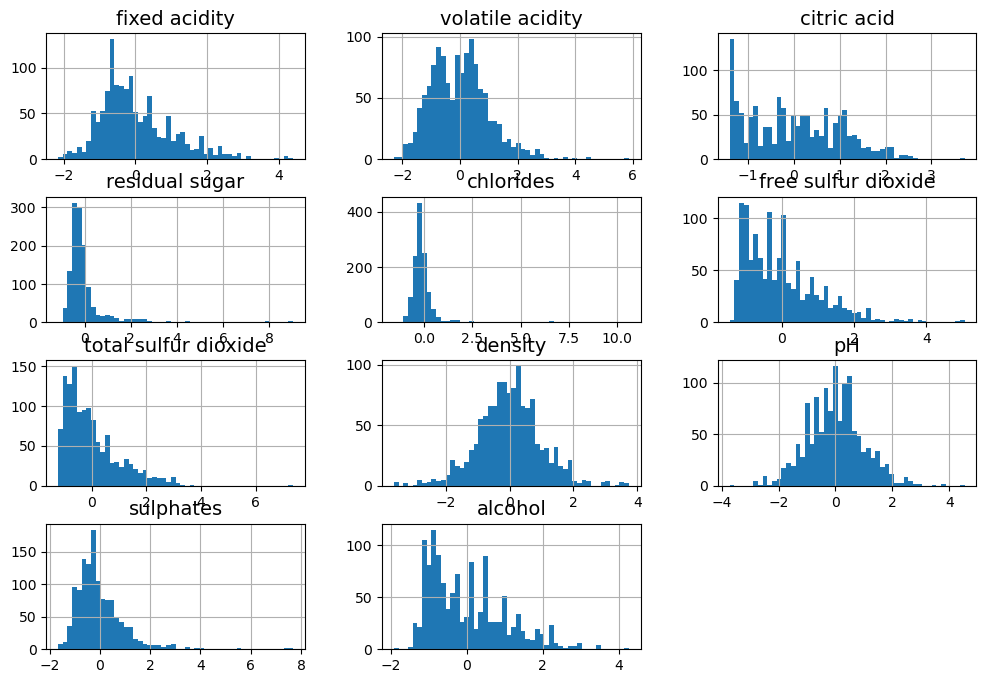

In [48]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
 
vt_train_scaled.hist(bins=50, figsize=(12, 8))
 
plt.show()

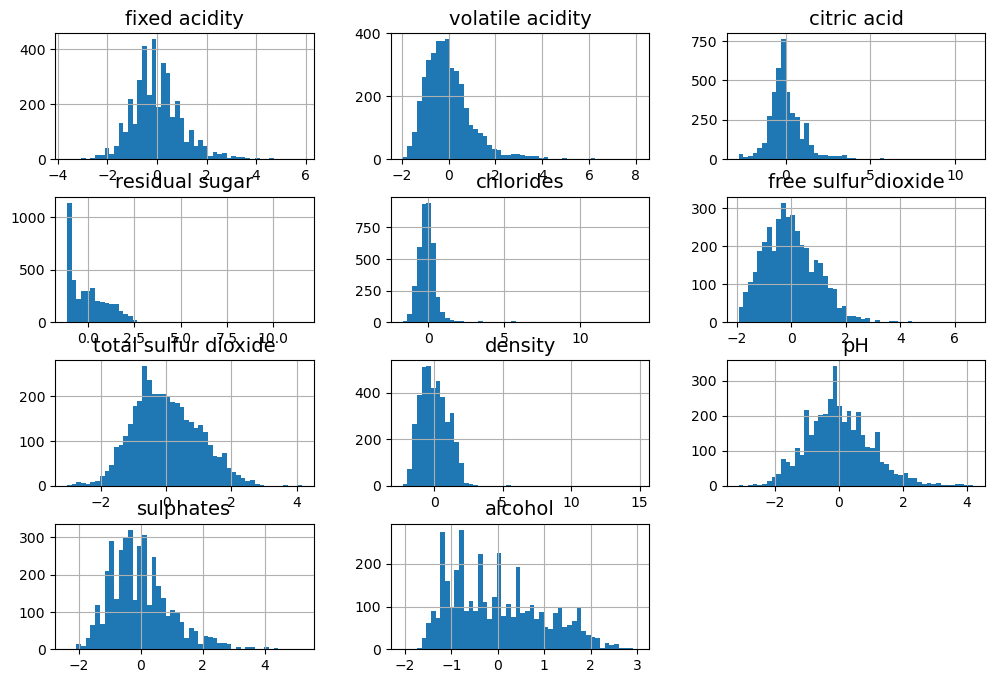

In [49]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
 
vb_train_scaled.hist(bins=50, figsize=(12, 8))
 
plt.show()